In [51]:
from keras.datasets import reuters
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [140]:
MAX_LEN = 300
(X_tr_enc, y_tr_enc), (X_ts_enc, y_ts_enc) = reuters.load_data(maxlen=MAX_LEN, skip_top=30)

In [141]:
NUM_CLS = len(np.unique(y_tr_enc))
X_tr_enc.shape, X_ts_enc.shape, NUM_CLS

((7976,), (1994,), 46)

In [142]:
from keras.utils import to_categorical
y_tr = to_categorical(y_tr_enc)
y_ts = to_categorical(y_ts_enc)
y_tr.shape, y_tr_enc.shape

((7976, 46), (7976,))

In [143]:
X_tr = np.array([smpl + [0]*(MAX_LEN - len(smpl)) for smpl in X_tr_enc]).reshape(-1, 300, 1)
X_ts = np.array([smpl + [0]*(MAX_LEN - len(smpl)) for smpl in X_ts_enc]).reshape(-1, 300, 1)
X_tr.shape, X_ts.shape

((7976, 300, 1), (1994, 300, 1))

In [144]:
baseline = stats.mode(y_tr_enc).count[0] / len(y_tr_enc)
print('Baseline:', baseline)

Baseline: 0.3817703109327984


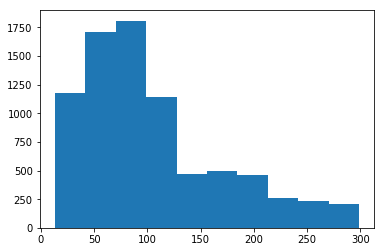

In [145]:
plt.hist([len(smpl) for smpl in X_tr_enc]);

In [146]:
from keras import Input, Model, layers

inpt = Input(batch_shape=(None, MAX_LEN, 1))
x = layers.LSTM(64, return_sequences=True)(inpt)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
outpt = layers.Dense(NUM_CLS, activation='softmax')(x)

model = Model(inpt, outpt)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 300, 1)            0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 300, 64)           16896     
_________________________________________________________________
lstm_39 (LSTM)               (None, 300, 64)           33024     
_________________________________________________________________
lstm_40 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_19 (Dense)             (None, 46)                2990      
Total params: 85,934
Trainable params: 85,934
Non-trainable params: 0
_________________________________________________________________


In [147]:
from sklearn.cross_validation import train_test_split

X_t, X_v, y_t, y_v = train_test_split(X_tr, y_tr, test_size=0.2)

model.fit(X_t, y_t,
          epochs=5,
          batch_size=32,
          validation_data=(X_v, y_v))

Train on 6380 samples, validate on 1596 samples
Epoch 1/5
6380/6380 [==============================] - 147s 23ms/step - loss: 2.4304 - acc: 0.3818 - val_loss: 2.3940 - val_acc: 0.3665
Epoch 2/5
6380/6380 [==============================] - 146s 23ms/step - loss: 2.2999 - acc: 0.3856 - val_loss: 2.3843 - val_acc: 0.3659
Epoch 3/5
6380/6380 [==============================] - 145s 23ms/step - loss: 2.2982 - acc: 0.3859 - val_loss: 2.3881 - val_acc: 0.3672
Epoch 4/5
6380/6380 [==============================] - 149s 23ms/step - loss: 2.3012 - acc: 0.3839 - val_loss: 2.3850 - val_acc: 0.3672
Epoch 5/5
6380/6380 [==============================] - 147s 23ms/step - loss: 2.2977 - acc: 0.3856 - val_loss: 2.4096 - val_acc: 0.3672


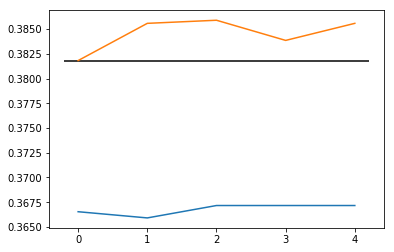

In [148]:
hst = model.history.history
plt.plot(hst['val_acc'])
plt.plot(hst['acc'])
plt.hlines(baseline, *plt.xlim())